# Linear Regression by Gradient Descent

https://www.youtube.com/watch?v=ACU-T9L4_lI

In [163]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [2]:
def lin(a, b, x): return a*x + b

In [3]:
a = 2
b = 4

In [11]:
n = 50
x = np.random.rand(n)
y = lin(a, b, x)

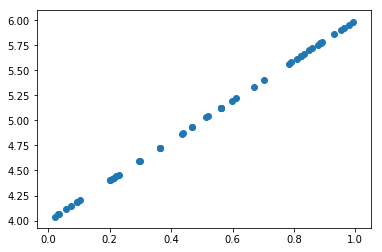

In [13]:
plt.scatter(x, y);

In [58]:
def sse(y_true, y_pred): return ((y_true - y_pred)**2).sum()

In [147]:
a_guess = -3
b_guess = 6

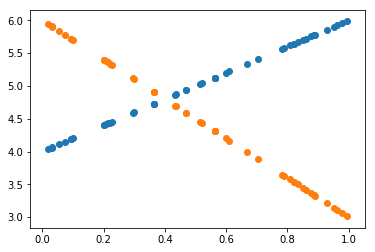

In [148]:
plt.scatter(x, y)
plt.scatter(x, lin(a_guess, b_guess, x));

In [149]:
sse(y, lin(a_guess, b_guess, x))

137.7882458510384

In [150]:
def loss(y, a, b, x): return sse(y, lin(a, b, x))

$L = \sum_n (y_t - (ax + b))^2$

$\frac{dL}{da} = -2(y_t - (ax + b))x$

$\frac{dL}{db} = -2(y_t - (ax + b))$

In [151]:
lr = 0.01

In [152]:
def update():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    l = loss(y, a_guess, b_guess, x)
    dLdb = -2 * (y - y_pred)
    dLda = dLdb * x
    a_guess -= lr * dLda.mean()
    b_guess -= lr * dLdb.mean()
    return l

In [153]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
line, = ax.plot(x, lin(a_guess, b_guess, x), c='firebrick')
ax.set_title('Loss = 0.00')
plt.close()

def animate(i):
    for i in range(20): l = update()
    ax.set_title('Loss = %.2f' % l)
    line.set_data(x, lin(a_guess, b_guess, x))
    return line,

anim = FuncAnimation(fig, animate, frames=100, interval=150, blit=True)

In [154]:
HTML(anim.to_html5_video())

## Do the same thing with Keras

In [196]:
model = Sequential([Dense(1, input_shape=(1,))])

In [197]:
model.compile(SGD(0.01), 'mse')

In [198]:
h = model.fit(x, y, batch_size=n, epochs=1000, verbose=0)

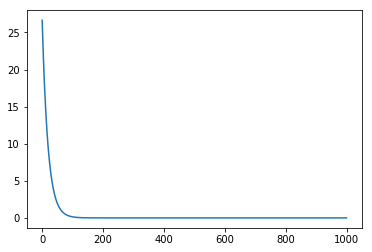

In [199]:
plt.plot(h.history['loss']);

In [200]:
model.get_weights()

[array([[ 2.01823878]], dtype=float32), array([ 3.98973131], dtype=float32)]

# End